<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Oving4.ipynb">Øving 4</a>
    </div>
    <ul class="nav navbar-nav">
        <li><a href="Grunnleggende%20om%20funksjoner.ipynb">Grunnleggende om funksjoner</a></li>
        <li><a href="Varierte%20funksjoner.ipynb">Varierte funksjoner</a></li>
        <li><a href="Lokale%20variabler.ipynb">Lokale variabler</a></li>
        <li><a href="Globale%20variabler.ipynb">Globale variabler</a></li>
        <li><a href="Euklids%20algoritme.ipynb">Euklids algoritme</a></li>
        <li><a href="Primtall.ipynb">Primtall</a></li>
        <li><a href="Multiplikasjon.ipynb">Multiplikasjon</a></li>
        <li><a href="Poenggrenser.ipynb">Poenggrenser</a></li>
        <li class="active"><a href="Den%20store%20sporreundersokelsen.ipynb">Den store spørreundersøkelsen</a></li>
        <li><a href="Arbeidsdager.ipynb">Arbeidsdager</a></li>
        <li><a href="Sekantmetoden.ipynb">Sekantmetoden</a></li>
        <li><a href="Not%20quite%20Blackjack.ipynb">Not quite Blackjack</a></li>
    </ul>
  </div>
</nav>

## Den store spørreundersøkelsen

**Læringsmål:**

* Funksjoner 
* Betingelser
* Løkker
* Numpy
 

**I denne oppgaven skal du skrive et større program. For denne typen oppgaver kan det være mer praktisk å laste ned python og eventuelt en IDE (Et område man programmerer i på sin egen maskin). Ta derfor en kikk [her](https://docs.google.com/document/d/17tS0maWyzORUsIjmCVEszfqrl2X4By-Cy2Sw3ENG5lA/edit?usp=sharing) før du begynner. Det er fortsatt mulig å gjøre oppgaven i Jupyter dersom du ikke ønsker å jobbe lokalt**
 
I denne oppgaven skal du implementere et lite utdrag av en spørreundersøkelse om leksevaner til studenter. Undersøkelsen er beregnet for kvinner og menn i aldersgruppen 16-25 år.

Spørreundersøkelsen implementeres ved hjelp av å skrive ut spørsmål og lese input fra brukeren i en while-løkke som kjøres så lenge brukeren ønsker å skrive inn data. Når alle spørsmålene er besvart, gjentas spørsmålene for en ny person. 

Hold styr på global(e) teller(e) (variable(r)) under kjøringen av while-løkken: **antall_kvinner**, **antall_menn**, **antall_fag**, **antall_ITGK**, og **antall_timer_lekser**. Hvordan du holder styr på disse er opp til deg selv. Enten det er ved hjelp av fem variabler, eller ved hjelp av et _array_. Hvis brukeren til enhver tid svarer "hade" på et spørsmål skal while-løkken avsluttes og verdiene av tellerne skal oppdatere en tekstfil som allerede innheholder resultater fra en tidligere kjøring. Deretter skal både nye og gamle verdier skrives ut.

I programmet ditt kan du få bruk for:

exit() vil avslutte kjøringen av programmet.

Bruk funksjoner til å lese inn svar fra brukeren (de bør være forskjellige om brukeren skriver inn et tall eller en streng), og til å skrive ut statistikk til slutt (oppgave g).

Funksjoner som kan implementeres i løpet av oppgaven er:

`sjekk_svar(spm)`
`les_streng(spm)`
`les_ja_nei(spm)`
`les_tall(spm)`
`lagre_og_skriv_statistikk()`
`les_statistikk()`
`lagre_statistikk()`
(Der spm er svaret på de forskjellige spørsmålene som skal stilles i while-løkken)

Deloppgave a til e skal altså implementeres inni while-løkken.

I tillegg til `sys` vil du få bruk for `numpy`:

Under er det allredere skrevet en funksjon for deg, som du kan bruke for å lese inn tidligere resultater fra filen `Resultater.txt`. Innholdet i denne filen nå er `0, 0, 0, 0, 0, 0`, hvor tallene (i rekkefølge) representerer `antall_kvinner`, `antall_menn`, `antall_ib`, `antall_fag`, `antall_ITGK`, og `antall_timer_lekser`. Prøv å kjøre kodeblokken under for å se innholdet i filen. Eventuelt kan filen ses [her](./Resultater.txt)

Når du skal lagre nye resultater, er det viktig at de tidligere resultatene ikke blir overskrevet. Du må derfor _først_ lese inn tidligere resultater, oppdatere arrayet som opprettes, oppdatere dette arrayet med de nye resultatene og til slutt lagre arrayet igjen.

In [20]:
import numpy as np

def get_stats():
    return np.loadtxt('results.txt')

def save_stats(stats : list):
    np.savetxt("results.txt", stats)

def read_yn(question : str):
    answ = ""
    while(answ != "y" and answ != "n"):
        answ = input(question)
    return answ

def read_num(question : str):
    digit = False
    while (not digit):
        num = input(question)
        digit = num.isdigit()
    return int(num)

def read_gender(question : str):
    gender = ""
    while(gender != "m" and gender != "f" and gender != "nb"):
        gender = input(question)
    return gender


def run_study():
    results = get_stats()
    n_women, n_men, n_nb, n_course, n_itgk, n_hours = results[0], results[1], results[2], results[3], results[4], results[5]

    contd = True
    while contd:
        print("\n*** Welcome to the study! ***")
        age = read_num("Enter your age: ")
        if age < 16 or age > 25:
            print("You are not within the age requirements for this research.\n")
            continue
        
        gender = read_gender("What is your gender? (f/m/nb): ")
        match gender:
            case "f":
                n_women += 1
            case "m":
                n_men += 1
            case "nb":
                n_nb += 1
            
        course = True if read_yn("Are you currently undertaking a course (or several)? (y/n): ") == "y" else False
        if course:
            n_course += 1
            if age < 22:
                itgk = True if read_yn("Are you undertaking a course in ITGK? (y/n): ") == "y" else False
            else:
                itgk = True if read_yn("Are you seriously undertaking a course in ITGK? (y/n): ") == "y" else False
            
            if itgk:
                n_itgk += 1
            
            hours_homework = read_num("How many hours per day (on average) do you spend on homework?: ")
            n_hours += hours_homework
        
        save_stats([n_women, n_men, n_nb, n_course, n_itgk, n_hours])
        
        contd = True if read_yn("\n\nRun research again? (y/n): ") == "y" else False


run_study()


*** Welcome to the study! ***


**a)** Be brukeren skrive inn kjønn og alder. Med for eksempel ***f*** for kvinne, ***m*** for mann og ***ib*** for ikke-binær, lagre disse i variablene **kjonn** og **alder**.



**b)** Sjekk om brukeren er innenfor tiltenkt aldersgruppe. Dersom brukeren er utenfor aldersgruppen, skriv en melding om at vedkommende ikke kan ta spørreundersøkelsen, og hopp tilbake til første spørsmål (kjønn).



**c)** Dersom brukeren er innenfor tiltenkt aldersgruppe, spør om brukeren tar et **fag**, med svaralternativene ja og nei. Deretter lagres svaret som en variabel fag. Ta utgangspunkt i denne variabelen når du avgjør om brukeren trenger å svare på de neste to spørsmålene eller ikke. Om noe annet svares, skal spørsmålet gjentas til et gyldig svaralternativ er gitt. 



**d)** Du skal nå spørre om brukeren tar ITGK og lagre svaret som en variabel **medlem_ITGK**, men spørsmålsteksten skal variere ut ifra alderen på brukeren

* Dersom brukeren er under 22 år skal spørsmålsteksten være: Tar du ITGK?
* Ellers skal spørsmålsteksten være: Tar virkelig du ITGK?


**e)** Spør brukeren hvor mange timer han/hun bruker i snitt daglig på lekser og lagre svaret i variabelen **timer_lekser**



**f)** Endre programmet ditt slik at de globale tellerne nevnt tidligere i oppgaven blir inkrementert i deloppgavene a til e.



**g)** Kjør programmet ditt, utfør noen undersøkelser, og avslutt ved å skrive hade. Sjekk at statistikken (verdiene av de globale tellerne) som skrives ut på slutten er korrekt. Sjekk også at tidligere resultater ikke blir borte. 

**h)** Kjør programmet ditt én gang til, og se at statistikken fra tidligere kjøring ikke blir overskrevet av den nye kjøringen.

**Eksempel på kjøring:**

```
Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: f
 Hvor gammel er du?: 21
 Tar du et eller flere fag? [ja/nei ]: bleh
 Tar du et eller flere fag? [ja/nei ]: ja
 Tar du ITGK? [ja/nei]: ja
 Hvor mange timer bruker du daglig (i snitt) på lekser?: 2

Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: m
 Hvor gammel er du?: 28
Du kan dessverre ikke ta denne undersøkelsen

Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: m
 Hvor gammel er du?: 25
 Tar du et eller flere fag? [ja/nei ]: ja
 Tar du virkelig ITGK?: nei
 Hvor mange timer bruker du daglig (i snitt) på lekser?: 5

Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: hade

Resultat av undersøkelse!
Antall nye kvinner: 1.0. Totalt antall kvinner: 1.0
Antall nye menn: 1.0. Totalt antall menn: 1.0
Antall nye ikke-binære: 1.0. Totalt antall ikke-binære: 1.0
Antall nye personer som tar fag: 2.0. Totalt antall personer som tar fag: 2.0
Antall nye personer som tar ITGK: 1.0. Totalt antall personer som tar ITGK: 1.0
Antall timer i snitt brukt på lekser denne undersøkelsen: 7.0
Antall timer i snitt brukt på lekser totalt: 7.0
 
 
################### NY KJØRING AV KODE ###################

Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: m
 Hvor gammel er du?: 23
 Tar du et eller flere fag? [ja/nei ]: ja
 Tar du virkelig ITGK?: ja
 Hvor mange timer bruker du daglig (i snitt) på lekser?: 8

Velkommen til spørreundersøkelsen!

 Hvilket kjønn er du? [f/m]: hade

Resultat av undersøkelse!
Antall nye kvinner: 0.0. Totalt antall kvinner: 1.0
Antall nye menn: 1.0. Totalt antall menn: 2.0
Antall nye ikke-binære: 1.0. Totalt antall ikke-binære: 1.0
Antall nye personer som tar fag: 1.0. Totalt antall personer som tar fag: 3.0
Antall nye personer som tar ITGK: 1.0. Totalt antall personer som tar ITGK: 2.0
Antall timer i snitt brukt på lekser denne undersøkelsen: 8.0
Antall timer i snitt brukt på lekser totalt: 7.5
 ```


## i) Plotting av resultater 

Lag funksjonen `plot_resultater()` som plotter et barchart av resultatene. Av barchartet skal det fremgå hvor mange kvinner, menn og ikke-binære som har svart på undersøkelsen, antall personer som tar fag og antall personer som tar ITGK.

Husk å importere `matplotlib`.

***Skriv koden din i kodeblokken under***

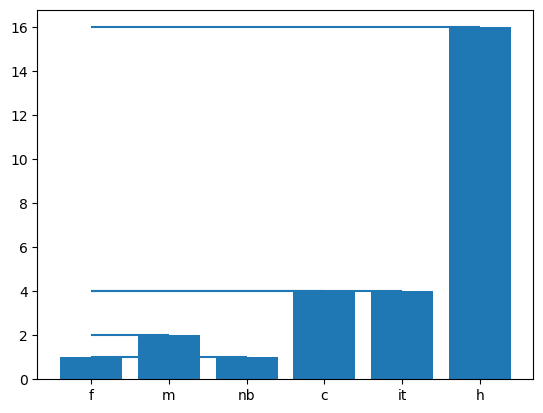

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline

y = get_stats()
x = ["f", "m", "nb", "c", "it", "h"]
plt.bar(x, y, align="center")
for i in range(len(y)):
    plt.hlines(y[i], 0, x[i])

plt.show()

Eksepmel på hvordan plottet kan se ut:

![img](../../Resources/Images/den_store_sporreundersokelsen.png)